# Plot last element available in Tiled

In [1]:
from bluesky import RunEngine

RE = RunEngine({})

In [2]:
from tiled.client import from_uri
from bluesky.callbacks.tiled_writer import TiledWriter

tiled_client = from_uri("http://127.0.0.1:8000", api_key="secret", include_data_sources=True)
tw = TiledWriter(tiled_client)
RE.subscribe(tw)

0

Let's create additional set of data using count plan:

In [3]:
from bluesky.plans import count
from ophyd.sim import noisy_det
RE(count([noisy_det], num=10, delay=1, md={"Operator": "John"}))

('fc85eed9-dcd9-4c9b-9786-fa5e9f158324',)

Last element available from Tiled:

In [4]:
run = tiled_client.values().last()

We can see the added metadate in the start document:

In [9]:
run.metadata

{'start': {'Operator': 'John',
           'detectors': ['noisy_det'],
           'hints': {'dimensions': [[['time'], 'primary']]},
           'num_intervals': 9,
           'num_points': 10,
           'plan_args': {'delay': 1,
                         'detectors': ["SynGauss(prefix='', name='noisy_det', "
                                       "read_attrs=['val'], "
                                       "configuration_attrs=['Imax', 'center', "
                                       "'sigma', 'noise', "
                                       "'noise_multiplier'])"],
                         'num': 10},
           'plan_name': 'count',
           'plan_type': 'generator',
           'scan_id': 1,
           'time': 1740425323.8627503,
           'uid': 'fc85eed9-dcd9-4c9b-9786-fa5e9f158324',
           'versions': {'bluesky': '1.13.1rc3.dev4+gea61fb99',
                        'ophyd': '1.10.0'}},
 'stop': {'exit_status': 'success',
          'num_events': {'primary': 10},
          '

The data is available in the events, and we can read the entire DataFrame:

In [6]:
data = run['primary']['internal']['events'].read()

In [7]:
data

seq_num  noisy_det  ts_noisy_det
0        1   0.964968  1.740425e+09
1        2   0.952826  1.740425e+09
2        3   1.045983  1.740425e+09
3        4   0.998192  1.740425e+09
4        5   1.083543  1.740425e+09
5        6   0.957522  1.740425e+09
6        7   0.984627  1.740425e+09
7        8   1.013502  1.740425e+09
8        9   1.089661  1.740425e+09
9       10   1.066491  1.740425e+09

Text(0, 0.5, 'val')

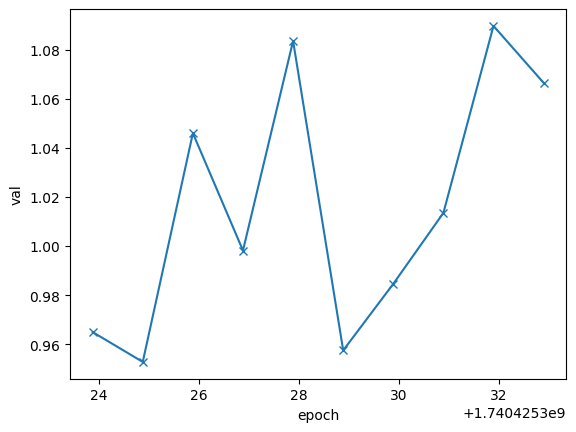

In [8]:
import matplotlib.pyplot as plt

x = data['ts_noisy_det']
noisy_det = data['noisy_det']

x_label = 'epoch'
y_label ='val'

ax = plt.plot(x,noisy_det,'-x')
plt.xlabel(x_label)
plt.ylabel(y_label)